In [447]:
%matplotlib notebook
import pandas as pd
import numpy as np
import os
import csv
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt


#data file to work with
file = os.path.join('cleanData', 'CleanFullDataSet.csv')

#read data file
main_data = pd.read_csv(file, low_memory = False)

In [448]:
labor_df = pd.DataFrame(main_data[['yearOfRegistration', 'gender', 'ageBroad', 'Citizenship Country','typeOfLabourConcatenated','typeOfSexConcatenated','Exploit Sub-Region', 'Exploit Country']])
labor_df.head(5)

,yearOfRegistration,gender,ageBroad,Citizenship Country,typeOfLabourConcatenated,typeOfSexConcatenated,Exploit Sub-Region,Exploit Country
0,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
1,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
2,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
3,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
4,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown


In [449]:
labor_pie_df = labor_df['typeOfLabourConcatenated'].value_counts()

#drop unknowns from the labour df
labor_pie_df = labor_pie_df.drop('unknown')

#Plot a pie chart of the Labor demographics by sector
#labor_pie_df.plot(kind="pie",startangle=120, title = "Labor Exploitation by Sector", shadow=True, colors = ['crimson', 'lawngreen', 'deepskyblue', 'gold', 'forestgreen', 'royalblue', 'orangered', 'aqua'], figsize=(9, 9))

In [450]:
country_count = labor_df["Exploit Country"].value_counts()
country_count

United States of America    12512
unknown                     10175
Ukraine                      5399
Republic of Moldova          4504
Russian Federation           2738
Philippines                  1988
Indonesia                    1777
Cambodia                     1000
Malaysia                      930
Ghana                         544
United Arab Emirates          504
Belarus                       400
Thailand                      391
Senegal                       370
Bulgaria                      356
Haiti                         339
Poland                        326
Saudi Arabia                  278
Romania                       259
Serbia                        248
Qatar                         239
Kazakhstan                    222
Kuwait                        209
Turkey                        197
North Macedonia               194
Uzbekistan                    193
Bosnia and Herzegovina        127
Uganda                        123
Japan                         111
Jordan        

In [451]:
exp_count = labor_df['Exploit Sub-Region'].value_counts()
exp_count


Eastern Europe                     14020
Northern America                   12512
unknown                            10175
South-eastern Asia                  6139
Western Asia                        1776
Sub-Saharan Africa                  1268
Southern Europe                      615
Central Asia                         495
Latin America and the Caribbean      455
Eastern Asia                         221
Southern Asia                        155
Northern Africa                       24
Western Europe                        24
Northern Europe                       17
Name: Exploit Sub-Region, dtype: int64

In [452]:
sex_df = labor_df['typeOfSexConcatenated'].value_counts()
sex_df = sex_df.drop('unknown')
#sex_df.plot(kind="pie",startangle=120, title = "Sex Statistics", shadow=True, colors = ['crimson', 'lawngreen', 'deepskyblue', 'gold', 'forestgreen', 'royalblue', 'orangered', 'aqua'], figsize=(9, 9))

In [453]:
#labour by country data frame 
country_df = pd.DataFrame(main_data[['typeOfLabourConcatenated', 'Exploit Sub-Region']])
country_df.head()
known_labor_df = country_df[country_df.typeOfLabourConcatenated != 'unknown']

In [454]:
#Datatable of Citizenship Country and Labour Sector
known_labor_df.tail(5)

,typeOfLabourConcatenated,Exploit Sub-Region
48753,Peddling,Northern America
48754,Peddling,Northern America
48755,Peddling,Northern America
48756,Peddling,Northern America
48757,Peddling,Northern America


In [455]:
subregions = ["Eastern Europe", "Northern America", "unknown", "South-eastern Asia", "Western Asia", "Sub-Saharan Africa", "Southern Europe", "Central Asia", "Latin America and the Caribbean", "Eastern Asia", "Southern Asia", "Northern Africa", "Western Europe", "Northern Europe"]


In [456]:
region_df = known_labor_df.groupby(["Exploit Sub-Region"])
region_df = region_df['typeOfLabourConcatenated'].value_counts()
region_df

Exploit Sub-Region               typeOfLabourConcatenated
Central Asia                     Construction                 126
Eastern Asia                     Domestic work                 42
                                 Other                          7
Eastern Europe                   Construction                1107
                                 Manufacturing                325
                                 Agriculture                  133
                                 Hospitality                   15
                                 Domestic work                 11
                                 Other                          5
Latin America and the Caribbean  Domestic work                103
                                 Other                          5
Northern Africa                  Domestic work                 11
Northern America                 Peddling                      58
                                 Other                         52
                  

In [457]:
region_df["South-eastern Asia"]["Domestic work"]

896

In [458]:
eastern_europe_labor_df = country_df[country_df["Exploit Sub-Region"] == 'Northern America']

In [459]:
eastern_pie_df = eastern_europe_labor_df['typeOfLabourConcatenated'].value_counts()
eastern_pie_df = eastern_pie_df.drop('unknown')


#eastern_pie_df.plot(kind="pie",startangle=120, title = "Labor Exploitation in Eastern Europe", shadow=True, colors = ['crimson', 'lawngreen', 'deepskyblue', 'gold', 'forestgreen', 'royalblue', 'orangered', 'aqua'], figsize=(9, 9))

In [460]:
plotdata = pd.DataFrame({
    "Domestic work":[11, 0, 1363, 896, 272, 0, 0, 0, 103, 42, 46, 11, 0, 0],
    "Construction":[1107, 0, 0, 0, 0, 0, 0, 126, 0, 0, 21, 0, 0, 25],
    "Begging":[0, 22, 0, 0, 0, 103, 0, 35, 0, 0, 0, 0, 0, 0],
    "Aquafarming":[0, 0, 13, 94, 0, 0, 0, 95, 0, 0, 0, 0, 35, 0],
    "Hospitality":[15, 0, 26, 15, 13, 0, 85, 0, 35, 0, 13, 0, 75, 0],
    "Manufacturing":[325, 0, 39, 89, 0, 0, 0, 0, 0, 0, 0, 0, 65, 0],
    "Peddling":[0, 58, 0, 0, 14, 0, 0, 85, 0, 0, 14, 0, 0, 45],
    "Other":[5, 52, 1, 12, 10, 47, 0, 75, 5, 7, 0, 0, 0, 0],
    "Agriculture":[133, 19, 1, 12, 0, 0, 65, 0, 15, 7, 0, 0, 0, 95],
    }, index = subregions
)

In [461]:
plotdata
#Table of sector of Labor Exploitation by Sub-region

,Domestic work,Construction,Begging,Aquafarming,Hospitality,Manufacturing,Peddling,Other,Agriculture
Eastern Europe,11,1107,0,0,15,325,0,5,133
Northern America,0,0,22,0,0,0,58,52,19
unknown,1363,0,0,13,26,39,0,1,1
South-eastern Asia,896,0,0,94,15,89,0,12,12
Western Asia,272,0,0,0,13,0,14,10,0
Sub-Saharan Africa,0,0,103,0,0,0,0,47,0
Southern Europe,0,0,0,0,85,0,0,0,65
Central Asia,0,126,35,95,0,0,85,75,0
Latin America and the Caribbean,103,0,0,0,35,0,0,5,15
Eastern Asia,42,0,0,0,0,0,0,7,7


<IPython.core.display.Javascript object>


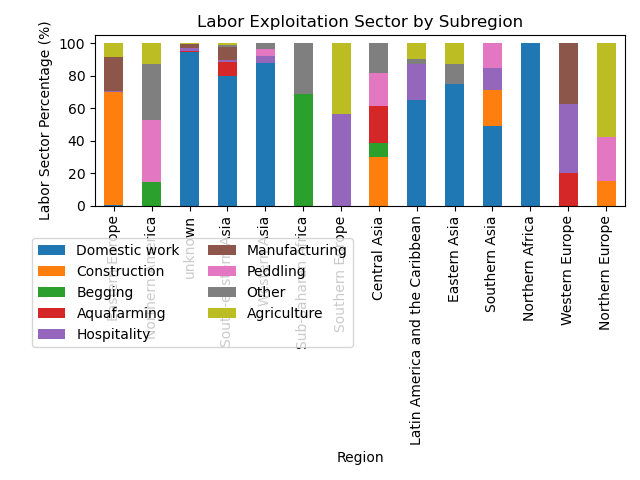

In [462]:
#Create a stacked percentage bar graph of Labor Exploitation per sector per region
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Labor Exploitation Sector by Subregion")
plt.xlabel("Region")
plt.ylabel("Labor Sector Percentage (%)")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.tight_layout()


In [463]:
#TO DO: Pick certain high volume countries for in depth analysis?

#List of high volume countries to pick: United States, Ukraine, Moldova, Russia, Philippines, Ghana, Indonesia, Malaysia,
#Ghana, Indonesia, Malaysia, Cambodia, UAE, Thailand

In [446]:
#TO DO: Sex Exploitation Sector Analysis

In [427]:
#TO DO: Compare exploitation statistics with economic data per country/region (maybe?)